###Importando Libs

In [ ]:
# Gráficos
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando Dataset do Drive
from google.colab import drive, files
import pandas as pd

#Treinamento e avaliação de métricas
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, roc_curve, auc, confusion_matrix, precision_recall_curve, average_precision_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import learning_curve
from collections import Counter
from scipy.stats import chi2_contingency


# Metodos de balanceamento
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler

#link para documentação https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### Importando dados de teste e treino

Substitua esse código para conseguir importar o dataset do seu drive ou localmente.

In [ ]:
drive.mount('/content/drive')

train_data = pd.read_csv('/content/drive/MyDrive/ia/lending/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/ia/lending/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Dando uma olhada no Head

In [ ]:
pd.set_option('display.max_columns', None)
train_data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.961959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001128,NaN,0
1,0.433333,2.025665e-06,0.036896,NaN,0.202035,0.0,1.487062e-07,0.863415,0.333333,0.435244,0.006466,NaN,0.041198,0.018891,0.000652,0.087470,NaN,0.065108,0.109073,0.433333,4.577322e-07,0.900587,0.0,0.535211,0.011363,0.011356,1.081000e-07,0.281690,0.022451,3.468532e-06,0.013128,0.159992,NaN,0.007222,0.092705,4.335154e-07,0.359848,0.013083,0.001564,NaN,0.004106,0.035440,0.002112,0.022365,8.255450e-07,NaN,0.009,0.500000,1.256651e-06,0.0,0.250000,NaN,0.004409,0.016618,3.786029e-07,0.001540,NaN,1.599900e-06,0.000000,NaN,0.000000,1
2,0.600000,1.503073e-02,0.064639,NaN,0.096657,0.0,1.478698e-07,0.954888,0.633333,0.382166,0.130769,NaN,0.035181,0.001299,0.007083,0.046034,NaN,0.003686,0.002722,0.533333,2.430092e-02,0.955168,0.0,0.866889,0.000543,0.046924,4.131000e-07,0.119800,0.001072,6.233016e-08,0.039583,0.005809,NaN,0.006240,0.000000,6.609240e-08,0.000000,0.019765,0.004882,NaN,0.000255,0.001411,0.015206,0.133405,6.426537e-07,NaN,0.000,0.109375,1.526074e-03,0.0,0.008929,NaN,0.000807,0.013685,1.074924e-07,0.000770,NaN,5.333333e-01,0.000702,NaN,0.000000,1
3,0.333333,1.555804e-07,0.056000,NaN,0.055959,0.0,1.120742e-07,0.512857,0.333333,0.382166,0.003960,NaN,0.007930,0.005359,0.000889,0.024500,NaN,0.195780,0.113267,0.333333,6.926119e-08,0.667101,0.0,0.655172,0.002567,0.005572,8.440000e-08,0.224138,0.005071,7.813809e-07,0.001085,0.009990,NaN,0.009873,0.001520,0.000000e+00,0.032468,0.004109,0.000126,NaN,0.000723,0.005215,0.001373,0.067095,1.626300e-07,NaN,0.000,0.142857,3.860662e-07,0.0,0.058824,NaN,0.000000,0.006843,1.839721e-07,0.000257,NaN,9.990000e-08,0.000379,NaN,0.066667,0
4,0.833333,8.325896e-07,0.090909,NaN,0.211483,0.0,3.115530e-07,0.873213,0.666667,0.433121,0.080417,NaN,0.038021,0.000758,0.006194,0.028016,NaN,0.079558,0.022815,0.766667,4.542247e-07,0.940980,0.0,0.492851,0.003835,0.016040,4.182000e-07,0.495374,0.004060,1.350992e-06,0.026449,0.021990,NaN,0.005419,0.013678,1.739930e-07,0.001711,0.017074,0.004216,NaN,0.000378,0.001591,0.062196,0.078278,6.910218e-07,NaN,0.000,0.433628,1.069284e-07,0.0,0.004695,NaN,0.001829,0.024438,8.865658e-08,0.000513,0.000002,4.699000e-07,0.000001,NaN,0.000000,1


# Separando features que a arvóre de decisão considerou importante

In [ ]:
selected_columns = [
    'x0', 'x3', 'x5', 'x10', 'x59', 'x7', 'x8', 'x19', 'x11', 'x39',
    'x49', 'x12', 'x25', 'x34', 'x32', 'x47', 'x17' , 'y'
]

# Criando os novos datasets de treino e teste com as colunas selecionadas
treino_features_arvore = train_data[selected_columns]
teste_features_arvore = test_data[selected_columns]

### Identificando colunas com muitos dados faltantes

In [ ]:
# Calcula a proporção de valores nulos em cada coluna

columns_to_test = [f'x{i}' for i in range(61)]
null_proportions = train_data[columns_to_test].isnull().mean()

# Filtra para mostrar apenas colunas com alta proporção de nulos (por exemplo, acima de 20%)
significant_null_columns = null_proportions[null_proportions > 0.3]

# Converte para DataFrame para visualização
significant_null_columns_df = significant_null_columns.reset_index()
significant_null_columns_df.columns = ['Column', 'Null Proportion']

# Exibe o DataFrame resultante no Colab
significant_null_columns_df.sort_values(by='Null Proportion', ascending=False)




,Column,Null Proportion
8,x56,0.692465
0,x3,0.528000
1,x11,0.528000
2,x16,0.528000
6,x45,0.528000
5,x39,0.376195
4,x33,0.364869
7,x54,0.364869
3,x32,0.302918


In [ ]:
columns_to_drop = significant_null_columns_df['Column'].tolist()
train_data_poucos_nulos = train_data.drop(columns=columns_to_drop)
test_data_poucos_nulos = test_data.drop(columns=columns_to_drop)

train_data_poucos_nulos.head()

,x0,x1,x2,x4,x5,x6,x7,x8,x9,x10,x12,x13,x14,x15,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x34,x35,x36,x37,x38,x40,x41,x42,x43,x44,x46,x47,x48,x49,x50,x51,x52,x53,x55,x57,x58,x59,x60,y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044001,NaN,NaN,NaN,NaN,NaN,0.001128,NaN,0
1,0.433333,2.025665e-06,0.036896,0.202035,0.0,1.487062e-07,0.863415,0.333333,0.435244,0.006466,0.041198,0.018891,0.000652,0.087470,0.065108,0.109073,0.433333,4.577322e-07,0.900587,0.0,0.535211,0.011363,0.011356,1.081000e-07,0.281690,0.022451,3.468532e-06,0.013128,0.159992,0.092705,4.335154e-07,0.359848,0.013083,0.001564,0.004106,0.035440,0.002112,0.022365,8.255450e-07,0.009,0.500000,1.256651e-06,0.0,0.250000,NaN,0.004409,0.016618,0.001540,1.599900e-06,0.000000,NaN,0.000000,1
2,0.600000,1.503073e-02,0.064639,0.096657,0.0,1.478698e-07,0.954888,0.633333,0.382166,0.130769,0.035181,0.001299,0.007083,0.046034,0.003686,0.002722,0.533333,2.430092e-02,0.955168,0.0,0.866889,0.000543,0.046924,4.131000e-07,0.119800,0.001072,6.233016e-08,0.039583,0.005809,0.000000,6.609240e-08,0.000000,0.019765,0.004882,0.000255,0.001411,0.015206,0.133405,6.426537e-07,0.000,0.109375,1.526074e-03,0.0,0.008929,NaN,0.000807,0.013685,0.000770,5.333333e-01,0.000702,NaN,0.000000,1
3,0.333333,1.555804e-07,0.056000,0.055959,0.0,1.120742e-07,0.512857,0.333333,0.382166,0.003960,0.007930,0.005359,0.000889,0.024500,0.195780,0.113267,0.333333,6.926119e-08,0.667101,0.0,0.655172,0.002567,0.005572,8.440000e-08,0.224138,0.005071,7.813809e-07,0.001085,0.009990,0.001520,0.000000e+00,0.032468,0.004109,0.000126,0.000723,0.005215,0.001373,0.067095,1.626300e-07,0.000,0.142857,3.860662e-07,0.0,0.058824,NaN,0.000000,0.006843,0.000257,9.990000e-08,0.000379,NaN,0.066667,0
4,0.833333,8.325896e-07,0.090909,0.211483,0.0,3.115530e-07,0.873213,0.666667,0.433121,0.080417,0.038021,0.000758,0.006194,0.028016,0.079558,0.022815,0.766667,4.542247e-07,0.940980,0.0,0.492851,0.003835,0.016040,4.182000e-07,0.495374,0.004060,1.350992e-06,0.026449,0.021990,0.013678,1.739930e-07,0.001711,0.017074,0.004216,0.000378,0.001591,0.062196,0.078278,6.910218e-07,0.000,0.433628,1.069284e-07,0.0,0.004695,NaN,0.001829,0.024438,0.000513,4.699000e-07,0.000001,NaN,0.000000,1


# Treinando o modelo de regressão logística

## Combinação Mediana e 0

#### Tratando Nulos

In [ ]:
from sklearn.impute import SimpleImputer

# Parâmetros para concentração de valores e limite de NaN
concentration_threshold = 0.1  # Limite para considerar valores concentrados perto de zero (exemplo: 10% do valor absoluto)
nan_threshold = 0.3  # Limite de NaN para considerar a substituição da coluna inteira (ex: 30%)

# Criar o imputer para substituir NaN pela mediana, sem ajustar ainda com os dados
imputer = SimpleImputer(strategy='median')

# Iterar sobre cada coluna do DataFrame de treino
for col in train_data.columns:
    # Verificar a proporção de NaN na coluna de treino
    nan_proportion = train_data[col].isna().mean()

    # Verificar a concentração de valores perto de zero no treino
    near_zero_proportion = (abs(train_data[col]) < concentration_threshold).mean()

    # Se a coluna tem muitos NaN e valores concentrados perto de zero, substituímos por 0
    if nan_proportion > nan_threshold and near_zero_proportion > 0.9:  # >90% dos valores estão perto de zero
        train_data.loc[:, col] = 0
        test_data.loc[:, col] = 0  # Aplicar a mesma transformação no conjunto de teste
        print(f"Coluna '{col}' substituída por 0 devido à alta concentração de valores perto de zero e muitos NaN.")
    else:
        # Caso contrário, ajustar o imputer no treino e transformar os NaN
        train_data.loc[:, col] = imputer.fit_transform(train_data[[col]])
        # Aplicar a transformação no conjunto de teste sem ajustar novamente o imputer
        test_data.loc[:, col] = imputer.transform(test_data[[col]])

# Segunda parte para train_data_poucos_nulos e test_data_poucos_nulos
for col in train_data_poucos_nulos.columns:
    # Verificar a proporção de NaN na coluna de treino
    nan_proportion = train_data_poucos_nulos[col].isna().mean()

    # Verificar a concentração de valores perto de zero no treino
    near_zero_proportion = (abs(train_data_poucos_nulos[col]) < concentration_threshold).mean()

    # Se a coluna tem muitos NaN e valores concentrados perto de zero, substituímos por 0
    if nan_proportion > nan_threshold and near_zero_proportion > 0.9:  # >90% dos valores estão perto de zero
        train_data_poucos_nulos.loc[:, col] = 0
        test_data_poucos_nulos.loc[:, col] = 0  # Aplicar a mesma transformação no conjunto de teste
        print(f"Coluna '{col}' substituída por 0 devido à alta concentração de valores perto de zero e muitos NaN.")
    else:
        # Caso contrário, ajustar o imputer no treino e transformar os NaN
        train_data_poucos_nulos.loc[:, col] = imputer.fit_transform(train_data_poucos_nulos[[col]])
        # Aplicar a transformação no conjunto de teste sem ajustar novamente o imputer
        test_data_poucos_nulos.loc[:, col] = imputer.transform(test_data_poucos_nulos[[col]])


for col in treino_features_arvore.columns:
    # Verificar a proporção de NaN na coluna de treino
    nan_proportion = treino_features_arvore[col].isna().mean()

    # Verificar a concentração de valores perto de zero no treino
    near_zero_proportion = (abs(treino_features_arvore[col]) < concentration_threshold).mean()

    # Se a coluna tem muitos NaN e valores concentrados perto de zero, substituímos por 0
    if nan_proportion > nan_threshold and near_zero_proportion > 0.9:  # >90% dos valores estão perto de zero
        treino_features_arvore.loc[:, col] = 0
        teste_features_arvore.loc[:, col] = 0  # Aplicar a mesma transformação no conjunto de teste
        print(f"Coluna '{col}' substituída por 0 devido à alta concentração de valores perto de zero e muitos NaN.")
    else:
        # Caso contrário, ajustar o imputer no treino e transformar os NaN
        treino_features_arvore.loc[:, col] = imputer.fit_transform(treino_features_arvore[[col]])
        # Aplicar a transformação no conjunto de teste sem ajustar novamente o imputer
        teste_features_arvore.loc[:, col] = imputer.transform(teste_features_arvore[[col]])


# Verificar se os NaNs foram substituídos no conjunto de treino e teste
print("Verificação das substituições de NaN:")
for col in train_data.columns:
    nan_count_after_train = train_data[col].isna().sum()
    nan_count_after_test = test_data[col].isna().sum()
    print(f"Coluna '{col}': {nan_count_after_train} NaNs restantes no treino, {nan_count_after_test} NaNs restantes no teste.")



Verificação das substituições de NaN:
Coluna 'x0': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x1': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x2': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x3': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x4': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x5': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x6': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x7': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x8': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x9': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x10': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x11': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x12': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna 'x13': 0 NaNs restantes no treino, 0 NaNs restantes no teste.
Coluna

### Utilizando o PCA

In [ ]:
# Separa a coluna `y` como `y` e remove ela dos dados originais
y_train = train_data['y']
y_test = test_data['y']

# Remove `y` de `train_data` e `test_data`
train_data = train_data.drop(columns=['y'])
test_data = test_data.drop(columns=['y'])

pca = PCA(n_components=0.98)
train_data_pca = pca.fit_transform(train_data)
test_data_pca = pca.transform(test_data)

# Os novos datasets resultantes do PCA, com `y` separado
train_data_pca = pd.DataFrame(train_data_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
test_data_pca = pd.DataFrame(test_data_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Inclui `y` de volta, se necessário
train_data_pca['y'] = y_train.reset_index(drop=True)
test_data_pca['y'] = y_test.reset_index(drop=True)

train_data['y'] = y_train
test_data['y'] = y_test

#### Separando teste e treinamento

In [ ]:
X_treino = train_data.drop('y', axis=1)
y_treino = train_data['y']
X_teste = test_data.drop('y', axis=1)
y_teste = test_data['y']

### Definindo os hiperparâmetros e treinando o modelo

In [ ]:
# Configurar e treinar o modelo de regressão logística
logistica = LogisticRegression(random_state=1, C=1, max_iter= 100, penalty= 'l2', solver= 'lbfgs', tol= 0.0001)

# Treinar o modelo
logistica.fit(X_treino, y_treino)

LogisticRegression(C=1, random_state=1)

#### Avaliando o modelo no conjunto de treino

In [ ]:
# 5. Avaliar o modelo no conjunto de treino

previsoes_treino = logistica.predict(X_treino)

# Acurácia no treino
acuracia_treino = accuracy_score(y_treino, previsoes_treino)
print("Acurácia no Treino: %.2f%%" % (acuracia_treino * 100.0))

Acurácia no Treino: 86.10%


In [ ]:
# Matriz de confusão no treino
print("Matriz de Confusão (Treino):")
print(confusion_matrix(y_treino, previsoes_treino))

Matriz de Confusão (Treino):
[[  2259  19598]
 [  1540 128641]]


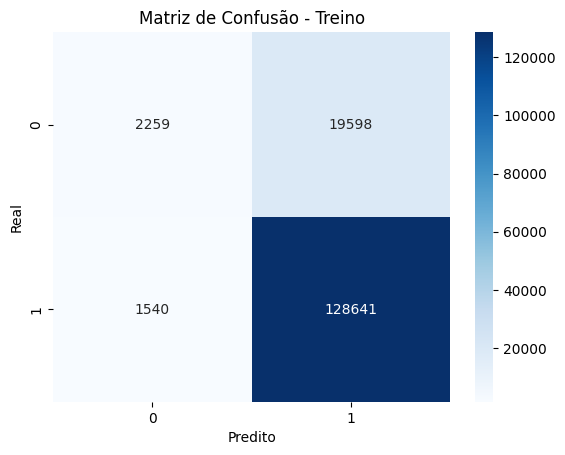

In [ ]:
cm = confusion_matrix(y_treino, previsoes_treino)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Treino')
plt.show()

#### Avaliando modelo no conjunto de teste

In [ ]:
# 6. Fazer previsões no conjunto de teste

previsoes_teste = logistica.predict(X_teste)

# Acurácia no teste
acuracia_teste = accuracy_score(y_teste, previsoes_teste)
print("Acurácia no Teste: %.2f%%" % (acuracia_teste * 100.0))

Acurácia no Teste: 79.64%


AUC: 0.71


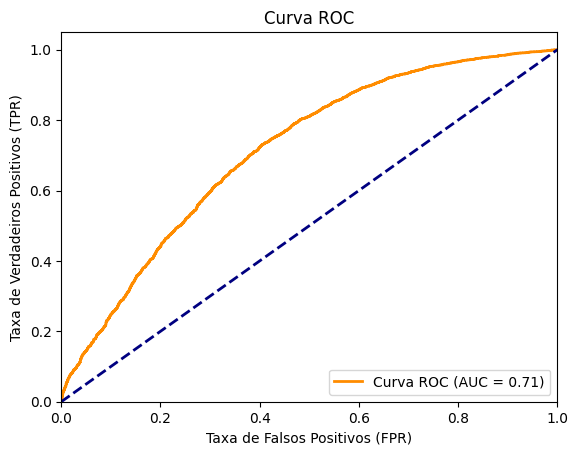

In [ ]:
previsoes_prob_teste = logistica.predict_proba(X_teste)[:, 1]  # Pega as probabilidades para a classe positiva (classe 1)

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_teste, previsoes_prob_teste)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Exibir o valor da AUC
print("AUC: %.2f" % roc_auc)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha diagonal de chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Matriz de confusão no teste
print("Matriz de Confusão (Teste):")
print(confusion_matrix(y_teste, previsoes_teste))

Matriz de Confusão (Teste):
[[ 516 1872]
 [ 316 8042]]


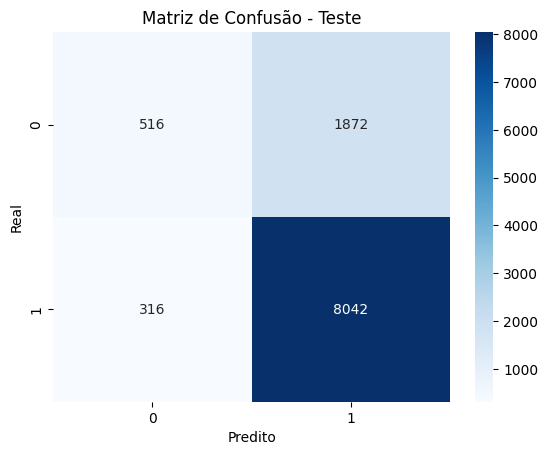

In [ ]:
cm = confusion_matrix(y_teste, previsoes_teste)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Teste')
plt.show()

In [ ]:
# Classification Report no teste
print("Relatório de Classificação (Teste):")
print(classification_report(y_teste, previsoes_teste))

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.62      0.22      0.32      2388
           1       0.81      0.96      0.88      8358

    accuracy                           0.80     10746
   macro avg       0.72      0.59      0.60     10746
weighted avg       0.77      0.80      0.76     10746



#### Ajustando threshold

In [ ]:
# Obter as probabilidades
y_prob = logistica.predict_proba(X_teste)[:, 1]

# Ajustar o threshold
threshold = 0.76  # Defina o valor desejado para o threshold
y_pred = (y_prob >= threshold).astype(int)

# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)
print("Matriz de Confusão:\n", matriz_confusao)

# Avaliar a acurácia (opcional)
print(classification_report(y_teste, y_pred))

# Valores definidos
lucro_por_pagamento = 200  # 20% de lucro para cada pagamento bem-sucedido
prejuizo_por_inadimplente = 1000  # Prejuízo de R$1000 para cada inadimplência

# Matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)
print("Matriz de Confusão:\n", matriz_confusao)

# Obter TP, FN, TN, FP
TP = matriz_confusao[1, 1]  # Pagadores previstos corretamente
FN = matriz_confusao[1, 0]  # Pagadores previstos incorretamente
TN = matriz_confusao[0, 0]  # Inadimplentes previstos corretamente
FP = matriz_confusao[0, 1]  # Inadimplentes previstos incorretamente (erros custosos)

# Calcule o lucro esperado
lucro_esperado = (TP * lucro_por_pagamento) - (FP * prejuizo_por_inadimplente)
print("Lucro Esperado:", lucro_esperado)

Matriz de Confusão:
 [[1441  947]
 [2372 5986]]
              precision    recall  f1-score   support

           0       0.38      0.60      0.46      2388
           1       0.86      0.72      0.78      8358

    accuracy                           0.69     10746
   macro avg       0.62      0.66      0.62     10746
weighted avg       0.76      0.69      0.71     10746

Matriz de Confusão:
 [[1441  947]
 [2372 5986]]
Lucro Esperado: 250200


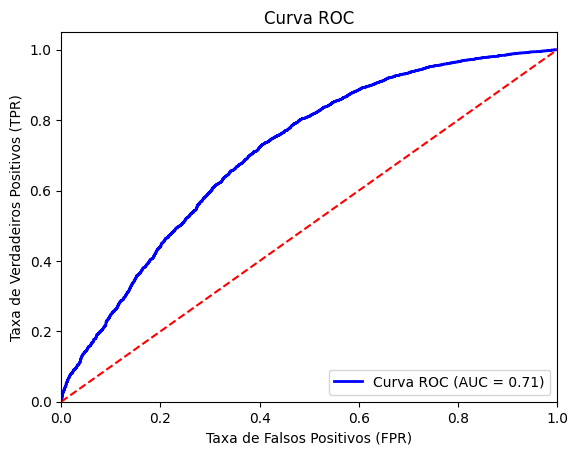

In [ ]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha aleatória
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

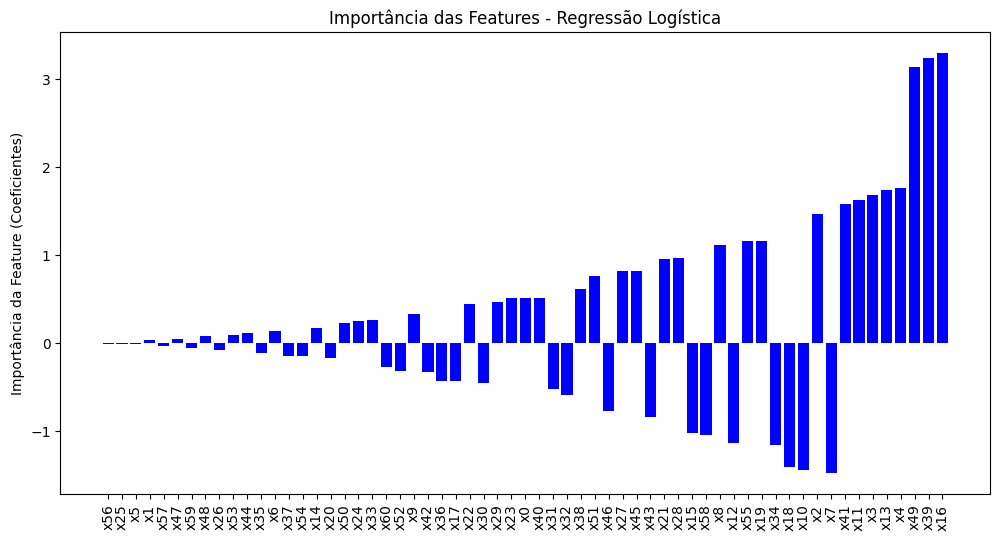

In [ ]:
# Extração da importância das features
feature_importance = logistica.coef_[0]  # Coeficientes do modelo para a regressão logística

# Ordenar por importância
indices = np.argsort(abs(feature_importance))[::-1]
sorted_importance = feature_importance[indices]

# Nomes das features (substitua pelos seus)
feature_names = [f'x{i}' for i in range(X_treino.shape[1])]
sorted_feature_names = np.array(feature_names)[indices]

# Criar um gráfico de barras vertical com os valores de importância no eixo Y e as features no eixo X
plt.figure(figsize=(12, 6))
plt.bar(sorted_feature_names[::-1], sorted_importance[::-1], color='blue')
plt.ylabel('Importância da Feature (Coeficientes)')
plt.xticks(rotation=90)  # Rotação dos labels no eixo X para melhor visualização
plt.title('Importância das Features - Regressão Logística')
plt.show()

# Treinando com features selecionadas pela Árvore de Decisão

#### Separando teste e treinamento

In [ ]:
X_treino = treino_features_arvore.drop('y', axis=1)
y_treino = treino_features_arvore['y']
X_teste = teste_features_arvore.drop('y', axis=1)
y_teste = teste_features_arvore['y']

### Definindo os hiperparâmetros e treinando o modelo

In [ ]:
# Configurar e treinar o modelo de regressão logística
logistica = LogisticRegression(random_state=1, C=1, max_iter= 100, penalty= 'l2', solver= 'lbfgs', tol= 0.0001)

# Treinar o modelo
logistica.fit(X_treino, y_treino)

LogisticRegression(C=1, random_state=1)

#### Avaliando o modelo no conjunto de treino

In [ ]:
# 5. Avaliar o modelo no conjunto de treino

previsoes_treino = logistica.predict(X_treino)

# Acurácia no treino
acuracia_treino = accuracy_score(y_treino, previsoes_treino)
print("Acurácia no Treino: %.2f%%" % (acuracia_treino * 100.0))

Acurácia no Treino: 85.97%


In [ ]:
# Matriz de confusão no treino
print("Matriz de Confusão (Treino):")
print(confusion_matrix(y_treino, previsoes_treino))

Matriz de Confusão (Treino):
[[  1259  20598]
 [   730 129451]]


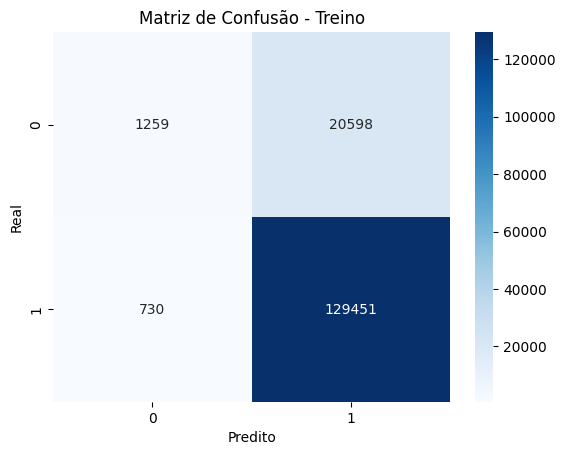

In [ ]:
cm = confusion_matrix(y_treino, previsoes_treino)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Treino')
plt.show()

#### Avaliando modelo no conjunto de teste

In [ ]:
# 6. Fazer previsões no conjunto de teste

previsoes_teste = logistica.predict(X_teste)

# Acurácia no teste
acuracia_teste = accuracy_score(y_teste, previsoes_teste)
print("Acurácia no Teste: %.2f%%" % (acuracia_teste * 100.0))

Acurácia no Teste: 79.08%


AUC: 0.69


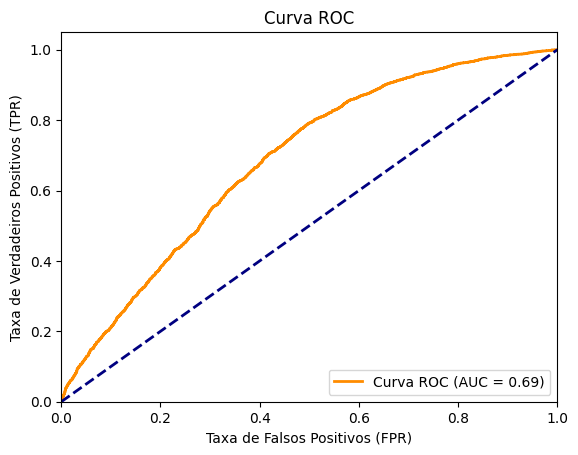

In [ ]:
previsoes_prob_teste = logistica.predict_proba(X_teste)[:, 1]  # Pega as probabilidades para a classe positiva (classe 1)

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_teste, previsoes_prob_teste)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Exibir o valor da AUC
print("AUC: %.2f" % roc_auc)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha diagonal de chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Matriz de confusão no teste
print("Matriz de Confusão (Teste):")
print(confusion_matrix(y_teste, previsoes_teste))

Matriz de Confusão (Teste):
[[ 332 2056]
 [ 192 8166]]


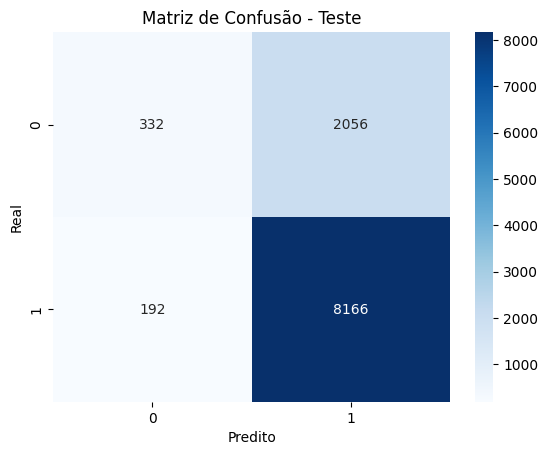

In [ ]:
cm = confusion_matrix(y_teste, previsoes_teste)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Teste')
plt.show()

In [ ]:
# Classification Report no teste
print("Relatório de Classificação (Teste):")
print(classification_report(y_teste, previsoes_teste))

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.63      0.14      0.23      2388
           1       0.80      0.98      0.88      8358

    accuracy                           0.79     10746
   macro avg       0.72      0.56      0.55     10746
weighted avg       0.76      0.79      0.73     10746



#### Ajustando threshold

In [ ]:
# Obter as probabilidades
y_prob = logistica.predict_proba(X_teste)[:, 1]

# Ajustar o threshold
threshold = 0.7  # Defina o valor desejado para o threshold
y_pred = (y_prob >= threshold).astype(int)

# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)
print("Matriz de Confusão:\n", matriz_confusao)

# Avaliar a acurácia (opcional)
print(classification_report(y_teste, y_pred))

Matriz de Confusão:
 [[1120 1268]
 [1563 6795]]
              precision    recall  f1-score   support

           0       0.42      0.47      0.44      2388
           1       0.84      0.81      0.83      8358

    accuracy                           0.74     10746
   macro avg       0.63      0.64      0.63     10746
weighted avg       0.75      0.74      0.74     10746



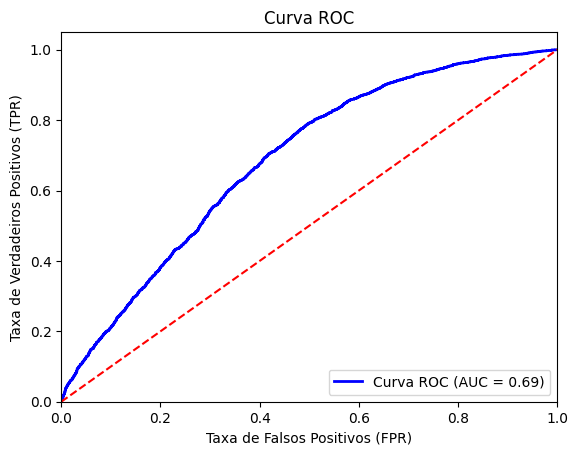

In [ ]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha aleatória
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

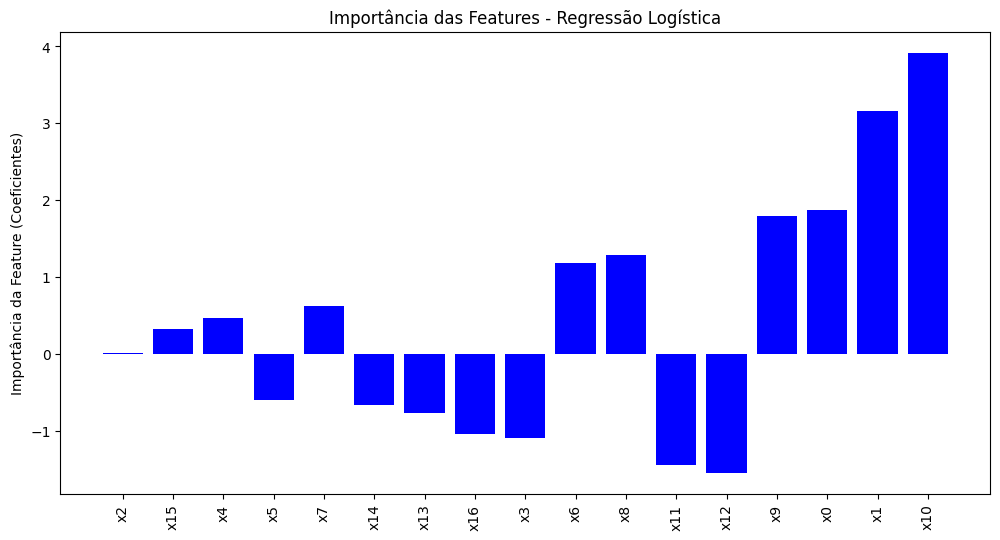

In [ ]:
# Extração da importância das features
feature_importance = logistica.coef_[0]  # Coeficientes do modelo para a regressão logística

# Ordenar por importância
indices = np.argsort(abs(feature_importance))[::-1]
sorted_importance = feature_importance[indices]

# Nomes das features (substitua pelos seus)
feature_names = [f'x{i}' for i in range(X_treino.shape[1])]
sorted_feature_names = np.array(feature_names)[indices]

# Criar um gráfico de barras vertical com os valores de importância no eixo Y e as features no eixo X
plt.figure(figsize=(12, 6))
plt.bar(sorted_feature_names[::-1], sorted_importance[::-1], color='blue')
plt.ylabel('Importância da Feature (Coeficientes)')
plt.xticks(rotation=90)  # Rotação dos labels no eixo X para melhor visualização
plt.title('Importância das Features - Regressão Logística')
plt.show()

# Treinando com as colunas extraídas com o PCA

#### Separando teste e treinamento

In [ ]:
X_treino = train_data_pca.drop('y', axis=1)
y_treino = train_data_pca['y']
X_teste = test_data_pca.drop('y', axis=1)
y_teste = test_data_pca['y']

### Definindo os hiperparâmetros e treinando o modelo

In [ ]:
# Configurar e treinar o modelo de regressão logística
logistica = LogisticRegression(random_state=1, C=10, max_iter= 300, penalty= 'l2', solver= 'lbfgs', tol= 0.0001)

# Treinar o modelo
logistica.fit(X_treino, y_treino)

LogisticRegression(C=10, max_iter=300, random_state=1)

#### Avaliando o modelo no conjunto de treino

In [ ]:
# 5. Avaliar o modelo no conjunto de treino

previsoes_treino = logistica.predict(X_treino)

# Acurácia no treino
acuracia_treino = accuracy_score(y_treino, previsoes_treino)
print("Acurácia no Treino: %.2f%%" % (acuracia_treino * 100.0))

Acurácia no Treino: 86.08%


In [ ]:
# Matriz de confusão no treino
print("Matriz de Confusão (Treino):")
print(confusion_matrix(y_treino, previsoes_treino))

Matriz de Confusão (Treino):
[[  2207  19650]
 [  1517 128664]]


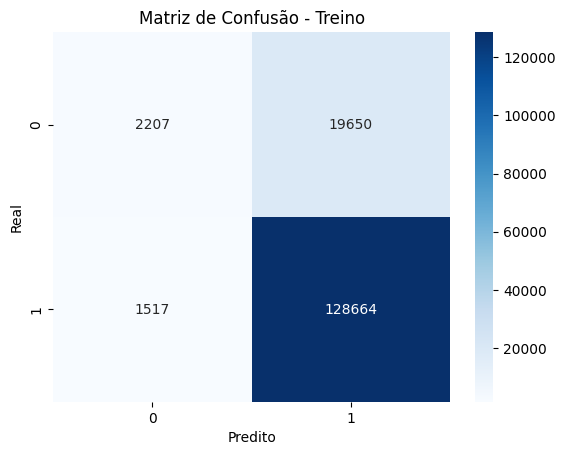

In [ ]:
cm = confusion_matrix(y_treino, previsoes_treino)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Treino')
plt.show()

#### Avaliando modelo no conjunto de teste

In [ ]:
# 6. Fazer previsões no conjunto de teste

previsoes_teste = logistica.predict(X_teste)

# Acurácia no teste
acuracia_teste = accuracy_score(y_teste, previsoes_teste)
print("Acurácia no Teste: %.2f%%" % (acuracia_teste * 100.0))

Acurácia no Teste: 79.53%


AUC: 0.71


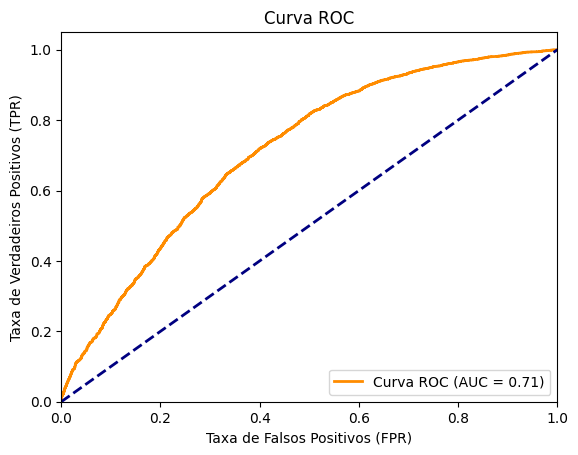

In [ ]:
previsoes_prob_teste = logistica.predict_proba(X_teste)[:, 1]  # Pega as probabilidades para a classe positiva (classe 1)

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_teste, previsoes_prob_teste)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Exibir o valor da AUC
print("AUC: %.2f" % roc_auc)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha diagonal de chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Matriz de confusão no teste
print("Matriz de Confusão (Teste):")
print(confusion_matrix(y_teste, previsoes_teste))

Matriz de Confusão (Teste):
[[ 514 1874]
 [ 326 8032]]


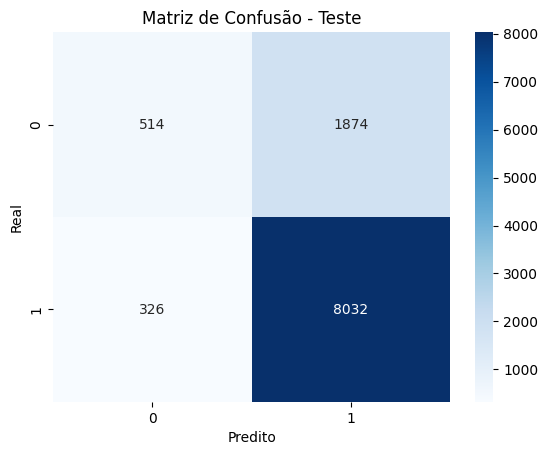

In [ ]:
cm = confusion_matrix(y_teste, previsoes_teste)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Teste')
plt.show()

In [ ]:
# Classification Report no teste
print("Relatório de Classificação (Teste):")
print(classification_report(y_teste, previsoes_teste))

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.61      0.22      0.32      2388
           1       0.81      0.96      0.88      8358

    accuracy                           0.80     10746
   macro avg       0.71      0.59      0.60     10746
weighted avg       0.77      0.80      0.75     10746



#### Ajustando threshold

In [ ]:
# Obter as probabilidades
y_prob = logistica.predict_proba(X_teste)[:, 1]

# Ajustar o threshold
threshold = 0.7  # Defina o valor desejado para o threshold
y_pred = (y_prob >= threshold).astype(int)

# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)
print("Matriz de Confusão:\n", matriz_confusao)

# Avaliar a acurácia (opcional)
print(classification_report(y_teste, y_pred))

Matriz de Confusão:
 [[1178 1210]
 [1479 6879]]
              precision    recall  f1-score   support

           0       0.44      0.49      0.47      2388
           1       0.85      0.82      0.84      8358

    accuracy                           0.75     10746
   macro avg       0.65      0.66      0.65     10746
weighted avg       0.76      0.75      0.75     10746



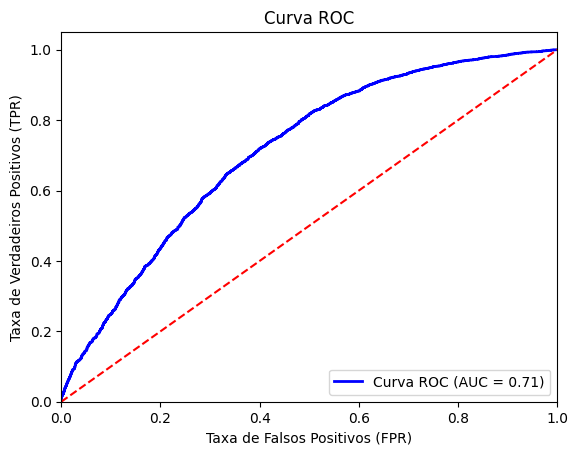

In [ ]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha aleatória
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

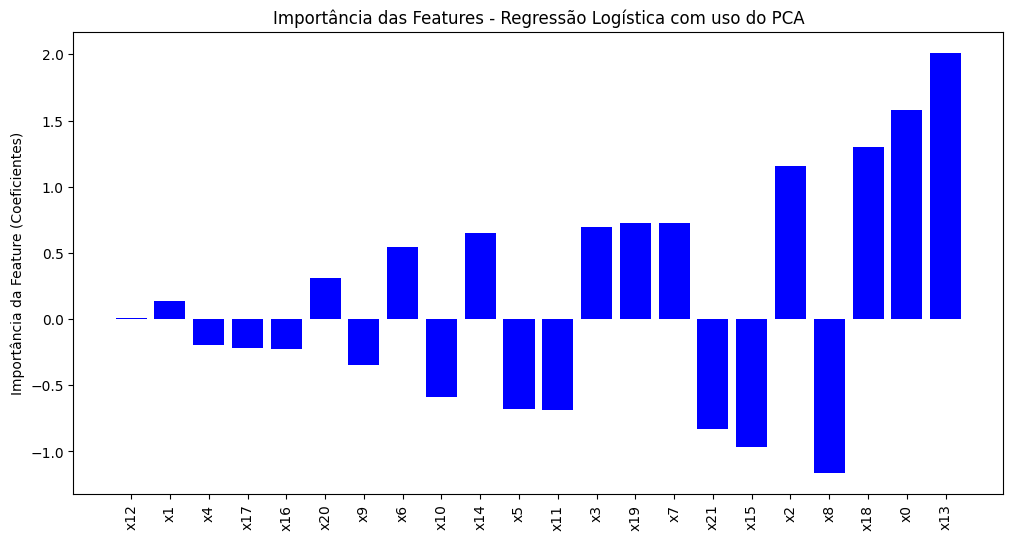

In [ ]:
# Extração da importância das features
feature_importance = logistica.coef_[0]  # Coeficientes do modelo para a regressão logística

# Ordenar por importância
indices = np.argsort(abs(feature_importance))[::-1]
sorted_importance = feature_importance[indices]

# Nomes das features (substitua pelos seus)
feature_names = [f'x{i}' for i in range(X_treino.shape[1])]
sorted_feature_names = np.array(feature_names)[indices]

# Criar um gráfico de barras vertical com os valores de importância no eixo Y e as features no eixo X
plt.figure(figsize=(12, 6))
plt.bar(sorted_feature_names[::-1], sorted_importance[::-1], color='blue')
plt.ylabel('Importância da Feature (Coeficientes)')
plt.xticks(rotation=90)  # Rotação dos labels no eixo X para melhor visualização
plt.title('Importância das Features - Regressão Logística com uso do PCA')
plt.show()

# Treinando sem as colunas com muitos dados faltantes (acima de 30%)

#### Separando teste e treinamento

In [ ]:
X_treino = train_data_poucos_nulos.drop('y', axis=1)
y_treino = train_data_poucos_nulos['y']
X_teste = test_data_poucos_nulos.drop('y', axis=1)
y_teste = test_data_poucos_nulos['y']

### Definindo os hiperparâmetros e treinando o modelo

In [ ]:
# Configurar e treinar o modelo de regressão logística
logistica = LogisticRegression(random_state=1, C=10, max_iter= 300, penalty= 'l2', solver= 'lbfgs', tol= 0.0001)
# Treinar o modelo
logistica.fit(X_treino, y_treino)

LogisticRegression(C=10, max_iter=300, random_state=1)

#### Avaliando o modelo no conjunto de treino

In [ ]:
# 5. Avaliar o modelo no conjunto de treino

previsoes_treino = logistica.predict(X_treino)

# Acurácia no treino
acuracia_treino = accuracy_score(y_treino, previsoes_treino)
print("Acurácia no Treino: %.2f%%" % (acuracia_treino * 100.0))

Acurácia no Treino: 86.11%


In [ ]:
# Matriz de confusão no treino
print("Matriz de Confusão (Treino):")
print(confusion_matrix(y_treino, previsoes_treino))

Matriz de Confusão (Treino):
[[  2243  19614]
 [  1500 128681]]


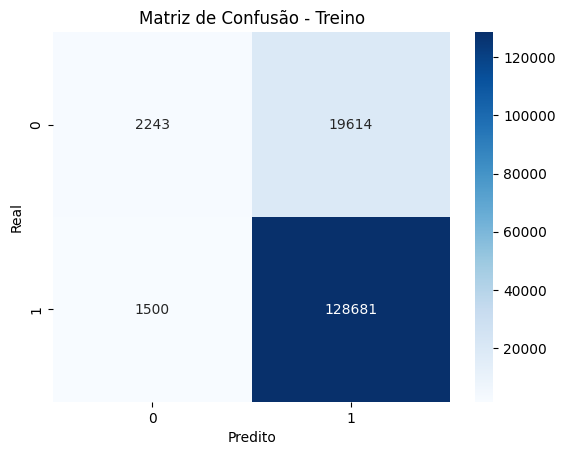

In [ ]:
cm = confusion_matrix(y_treino, previsoes_treino)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Treino')
plt.show()

#### Avaliando modelo no conjunto de teste

In [ ]:
# 6. Fazer previsões no conjunto de teste

previsoes_teste = logistica.predict(X_teste)

# Acurácia no teste
acuracia_teste = accuracy_score(y_teste, previsoes_teste)
print("Acurácia no Teste: %.2f%%" % (acuracia_teste * 100.0))

Acurácia no Teste: 79.65%


AUC: 0.72


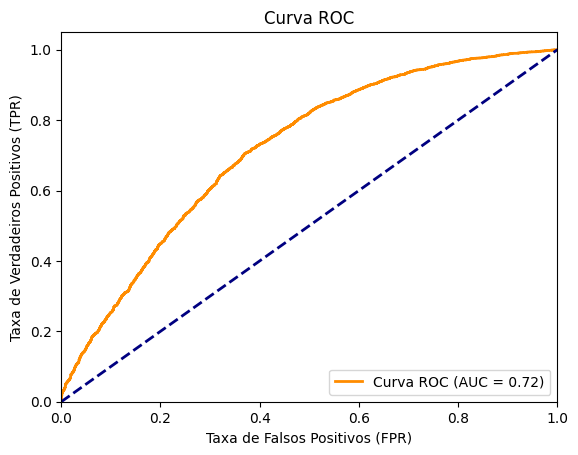

In [ ]:
previsoes_prob_teste = logistica.predict_proba(X_teste)[:, 1]  # Pega as probabilidades para a classe positiva (classe 1)

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_teste, previsoes_prob_teste)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Exibir o valor da AUC
print("AUC: %.2f" % roc_auc)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha diagonal de chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Matriz de confusão no teste
print("Matriz de Confusão (Teste):")
print(confusion_matrix(y_teste, previsoes_teste))

Matriz de Confusão (Teste):
[[ 520 1868]
 [ 319 8039]]


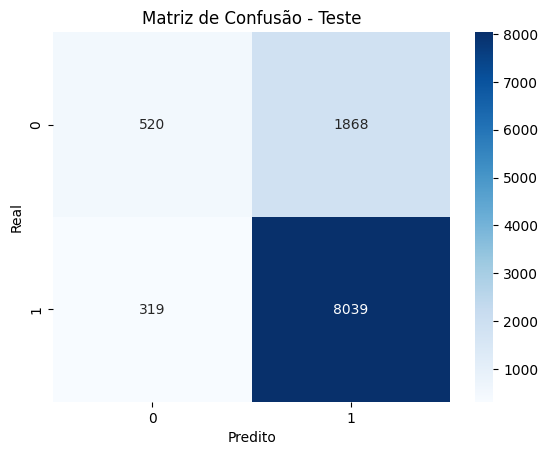

In [ ]:
cm = confusion_matrix(y_teste, previsoes_teste)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Teste')
plt.show()

In [ ]:
# Classification Report no teste
print("Relatório de Classificação (Teste):")
print(classification_report(y_teste, previsoes_teste))

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.62      0.22      0.32      2388
           1       0.81      0.96      0.88      8358

    accuracy                           0.80     10746
   macro avg       0.72      0.59      0.60     10746
weighted avg       0.77      0.80      0.76     10746



#### Ajustando threshold

In [ ]:
# Obter as probabilidades
y_prob = logistica.predict_proba(X_teste)[:, 1]

# Ajustar o threshold
threshold = 0.76  # Defina o valor desejado para o threshold
y_pred = (y_prob >= threshold).astype(int)

# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)
print("Matriz de Confusão:\n", matriz_confusao)

# Avaliar a acurácia (opcional)
print(classification_report(y_teste, y_pred))

Matriz de Confusão:
 [[1445  943]
 [2284 6074]]
              precision    recall  f1-score   support

           0       0.39      0.61      0.47      2388
           1       0.87      0.73      0.79      8358

    accuracy                           0.70     10746
   macro avg       0.63      0.67      0.63     10746
weighted avg       0.76      0.70      0.72     10746



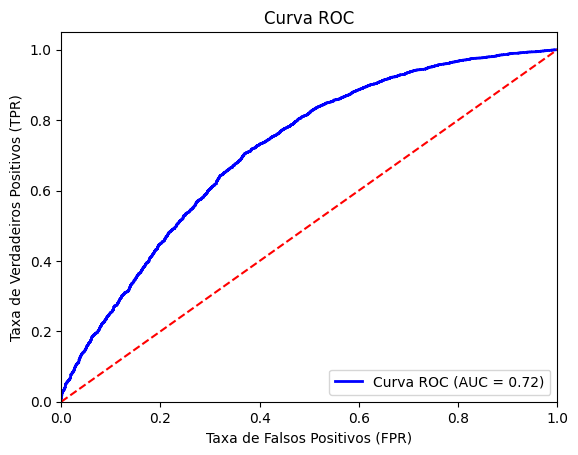

In [ ]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha aleatória
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

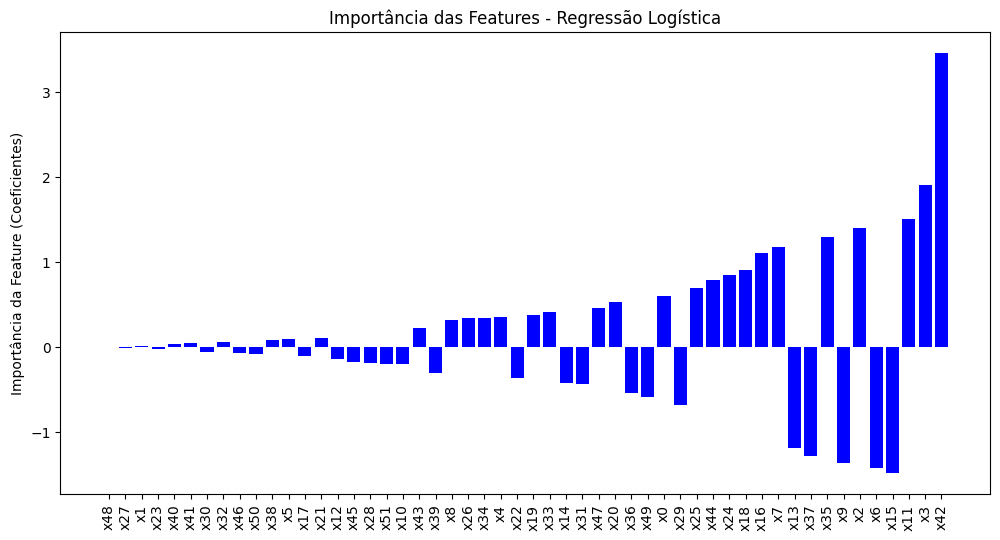

In [ ]:
# Extração da importância das features
feature_importance = logistica.coef_[0]  # Coeficientes do modelo para a regressão logística

# Ordenar por importância
indices = np.argsort(abs(feature_importance))[::-1]
sorted_importance = feature_importance[indices]

# Nomes das features (substitua pelos seus)
feature_names = [f'x{i}' for i in range(X_treino.shape[1])]
sorted_feature_names = np.array(feature_names)[indices]

# Criar um gráfico de barras vertical com os valores de importância no eixo Y e as features no eixo X
plt.figure(figsize=(12, 6))
plt.bar(sorted_feature_names[::-1], sorted_importance[::-1], color='blue')
plt.ylabel('Importância da Feature (Coeficientes)')
plt.xticks(rotation=90)  # Rotação dos labels no eixo X para melhor visualização
plt.title('Importância das Features - Regressão Logística')
plt.show()

# Usando Smote

In [ ]:
X_treino = train_data.drop('y', axis=1)
y_treino = train_data['y']
X_teste = test_data.drop('y', axis=1)
y_teste = test_data['y']

In [ ]:
# Aplicar SMOTE para oversampling da classe minoritária
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_smote, y_smote = smote.fit_resample(X_treino, y_treino)
print(f"Distribuição após o SMOTE: {Counter(y_smote)}")

Distribuição após o SMOTE: Counter({1: 130181, 0: 39054})


### Definindo os hiperparâmetros e treinando o modelo

In [ ]:
# Configurar e treinar o modelo de regressão logística
logistica = LogisticRegression(random_state=1, C=10, max_iter= 300, penalty= 'l2', solver= 'lbfgs', tol= 0.0001)

# Treinar o modelo
logistica.fit(X_smote, y_smote)

LogisticRegression(C=10, max_iter=300, random_state=1)

#### Avaliando o modelo no conjunto de treino

In [ ]:
# 5. Avaliar o modelo no conjunto de treino

previsoes_treino = logistica.predict(X_smote)

# Acurácia no treino
acuracia_treino = accuracy_score(y_smote, previsoes_treino)
print("Acurácia no Treino: %.2f%%" % (acuracia_treino * 100.0))

Acurácia no Treino: 79.11%


In [ ]:
# Matriz de confusão no treino
print("Matriz de Confusão (Treino):")
print(confusion_matrix(y_smote, previsoes_treino))

Matriz de Confusão (Treino):
[[  8293  30761]
 [  4595 125586]]


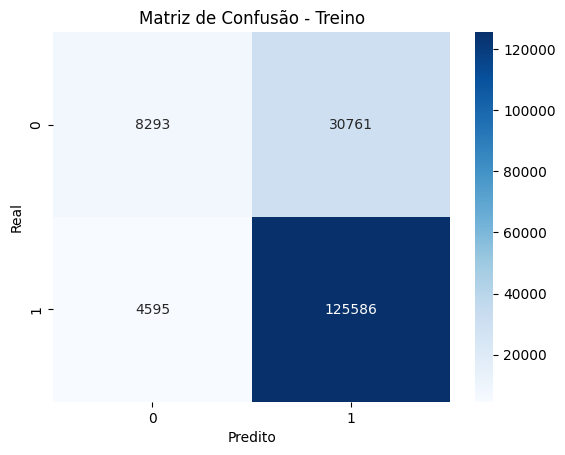

In [ ]:
cm = confusion_matrix(y_smote, previsoes_treino)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Treino')
plt.show()

#### Avaliando modelo no conjunto de teste

In [ ]:
# 6. Fazer previsões no conjunto de teste

previsoes_teste = logistica.predict(X_teste)

# Acurácia no teste
acuracia_teste = accuracy_score(y_teste, previsoes_teste)
print("Acurácia no Teste: %.2f%%" % (acuracia_teste * 100.0))

Acurácia no Teste: 77.91%


AUC: 0.71


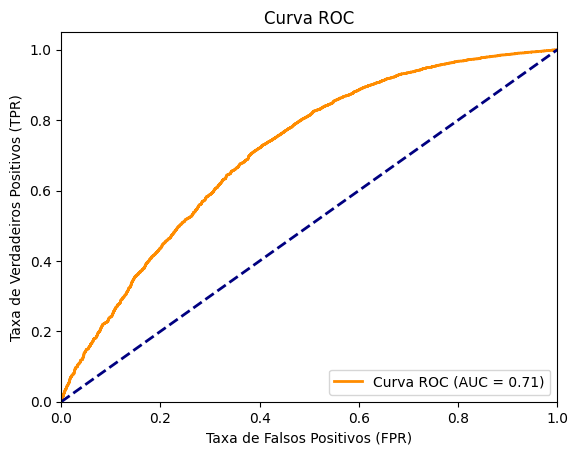

In [ ]:
previsoes_prob_teste = logistica.predict_proba(X_teste)[:, 1]  # Pega as probabilidades para a classe positiva (classe 1)

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_teste, previsoes_prob_teste)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Exibir o valor da AUC
print("AUC: %.2f" % roc_auc)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha diagonal de chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Matriz de confusão no teste
print("Matriz de Confusão (Teste):")
print(confusion_matrix(y_teste, previsoes_teste))

Matriz de Confusão (Teste):
[[ 950 1438]
 [ 936 7422]]


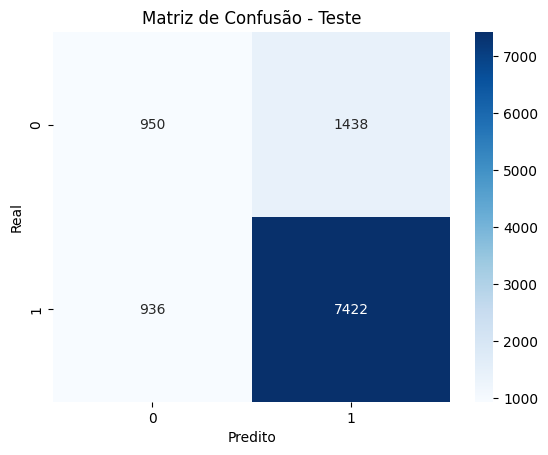

In [ ]:
cm = confusion_matrix(y_teste, previsoes_teste)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Teste')
plt.show()

In [ ]:
# Classification Report no teste
print("Relatório de Classificação (Teste):")
print(classification_report(y_teste, previsoes_teste))

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.50      0.40      0.44      2388
           1       0.84      0.89      0.86      8358

    accuracy                           0.78     10746
   macro avg       0.67      0.64      0.65     10746
weighted avg       0.76      0.78      0.77     10746



#### Ajustando threshold

In [ ]:
# Obter as probabilidades
y_prob = logistica.predict_proba(X_teste)[:, 1]

# Ajustar o threshold
threshold = 0.65  # Defina o valor desejado para o threshold
y_pred = (y_prob >= threshold).astype(int)

# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)
print("Matriz de Confusão:\n", matriz_confusao)

# Avaliar a acurácia (opcional)
print(classification_report(y_teste, y_pred))


Matriz de Confusão:
 [[1476  912]
 [2494 5864]]
              precision    recall  f1-score   support

           0       0.37      0.62      0.46      2388
           1       0.87      0.70      0.77      8358

    accuracy                           0.68     10746
   macro avg       0.62      0.66      0.62     10746
weighted avg       0.76      0.68      0.71     10746



# Smote + Undersample

In [ ]:
X_treino = train_data.drop('y', axis=1)
y_treino = train_data['y']
X_teste = test_data.drop('y', axis=1)
y_teste = test_data['y']

In [ ]:
# Aplicar SMOTE para oversampling da classe minoritária
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_smote, y_smote = smote.fit_resample(X_treino, y_treino)
print(f"Distribuição após o SMOTE: {Counter(y_smote)}")

Distribuição após o SMOTE: Counter({1: 130181, 0: 39054})


In [ ]:
# Aplicar RandomUnderSampler para reduzir a classe majoritária
undersample = RandomUnderSampler(sampling_strategy=0.6, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_smote, y_smote)
print(f"Distribuição após o undersampling: {Counter(y_resampled)}")

Distribuição após o undersampling: Counter({1: 65090, 0: 39054})


### Definindo os hiperparâmetros e treinando o modelo

In [ ]:
# Configurar e treinar o modelo de regressão logística
logistica = LogisticRegression(random_state=1, C=10, max_iter= 300, penalty= 'l2', solver= 'lbfgs', tol= 0.0001)

# Treinar o modelo
logistica.fit(X_resampled, y_resampled)

LogisticRegression(C=10, max_iter=300, random_state=1)

#### Avaliando o modelo no conjunto de treino

In [ ]:
# 5. Avaliar o modelo no conjunto de treino

previsoes_treino = logistica.predict(X_resampled)

# Acurácia no treino
acuracia_treino = accuracy_score(y_resampled, previsoes_treino)
print("Acurácia no Treino: %.2f%%" % (acuracia_treino * 100.0))

Acurácia no Treino: 70.61%


In [ ]:
# Matriz de confusão no treino
print("Matriz de Confusão (Treino):")
print(confusion_matrix(y_resampled, previsoes_treino))

Matriz de Confusão (Treino):
[[16613 22441]
 [ 8166 56924]]


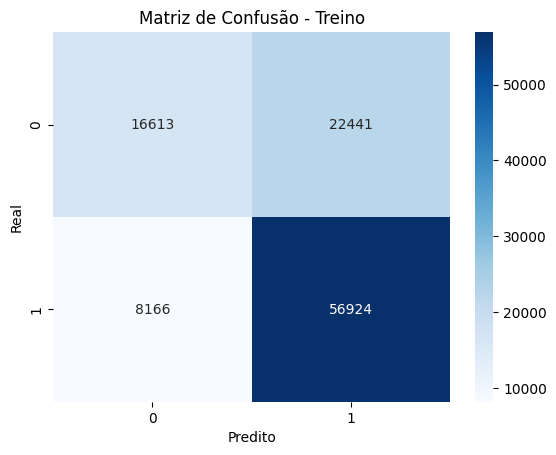

In [ ]:
cm = confusion_matrix(y_resampled, previsoes_treino)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Treino')
plt.show()

#### Avaliando modelo no conjunto de teste

In [ ]:
# 6. Fazer previsões no conjunto de teste

previsoes_teste = logistica.predict(X_teste)

# Acurácia no teste
acuracia_teste = accuracy_score(y_teste, previsoes_teste)
print("Acurácia no Teste: %.2f%%" % (acuracia_teste * 100.0))

Acurácia no Teste: 66.16%


AUC: 0.71


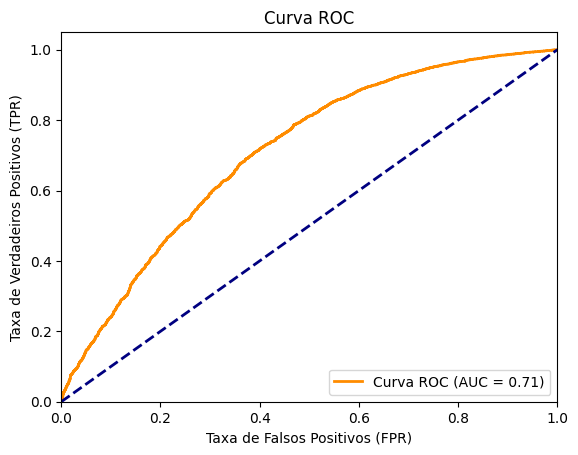

In [ ]:
previsoes_prob_teste = logistica.predict_proba(X_teste)[:, 1]  # Pega as probabilidades para a classe positiva (classe 1)

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_teste, previsoes_prob_teste)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Exibir o valor da AUC
print("AUC: %.2f" % roc_auc)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha diagonal de chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Matriz de confusão no teste
print("Matriz de Confusão (Teste):")
print(confusion_matrix(y_teste, previsoes_teste))

Matriz de Confusão (Teste):
[[1539  849]
 [2787 5571]]


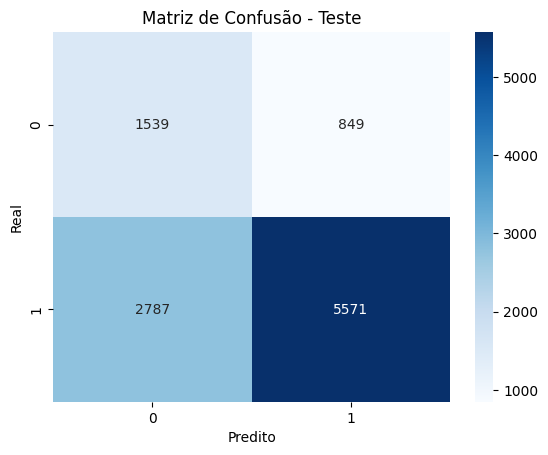

In [ ]:
cm = confusion_matrix(y_teste, previsoes_teste)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Teste')
plt.show()

In [ ]:
# Classification Report no teste
print("Relatório de Classificação (Teste):")
print(classification_report(y_teste, previsoes_teste))

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.36      0.64      0.46      2388
           1       0.87      0.67      0.75      8358

    accuracy                           0.66     10746
   macro avg       0.61      0.66      0.61     10746
weighted avg       0.75      0.66      0.69     10746



#### Ajustando threshold

In [ ]:
# Obter as probabilidades
y_prob = logistica.predict_proba(X_teste)[:, 1]

# Ajustar o threshold
threshold = 0.53 # Defina o valor desejado para o threshold
y_pred = (y_prob >= threshold).astype(int)

# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)
print("Matriz de Confusão:\n", matriz_confusao)

# Avaliar a acurácia (opcional)
print(classification_report(y_teste, y_pred))


Matriz de Confusão:
 [[1639  749]
 [3268 5090]]
              precision    recall  f1-score   support

           0       0.33      0.69      0.45      2388
           1       0.87      0.61      0.72      8358

    accuracy                           0.63     10746
   macro avg       0.60      0.65      0.58     10746
weighted avg       0.75      0.63      0.66     10746

